In [87]:
%matplotlib notebook
import numpy as np
from scipy.special import erf
import matplotlib.pyplot as plt
import dedalus.public as de

import ipywidgets as widgets

In [6]:
nx = 384
ny = 384
Lx = 1
Ly = 1

In [7]:
x = de.Fourier('x',nx,interval=[-Lx,Lx])
y = de.Fourier('y',ny,interval=[-Ly,Ly])

domain = de.Domain([x,y],grid_dtype='float')

In [8]:
phi = domain.new_field()

In [9]:
xx,yy = domain.grids()

In [85]:
delta = 0.05
k = 4*np.pi/Ly
omega = 1.
t = 0
hw = 0.1
ampl = 0.1

In [76]:
def sheet(x,y,k,omega,t,delta,hw,ampl):
    yy = y + ampl*np.sin(k*x - omega*t)
    return 0.5*(erf((yy+hw)/delta) - erf((yy-hw)/delta))

In [80]:
phi['g'] = sheet(xx,yy,k,omega,t,delta,hw,ampl)

<IPython.core.display.Javascript object>


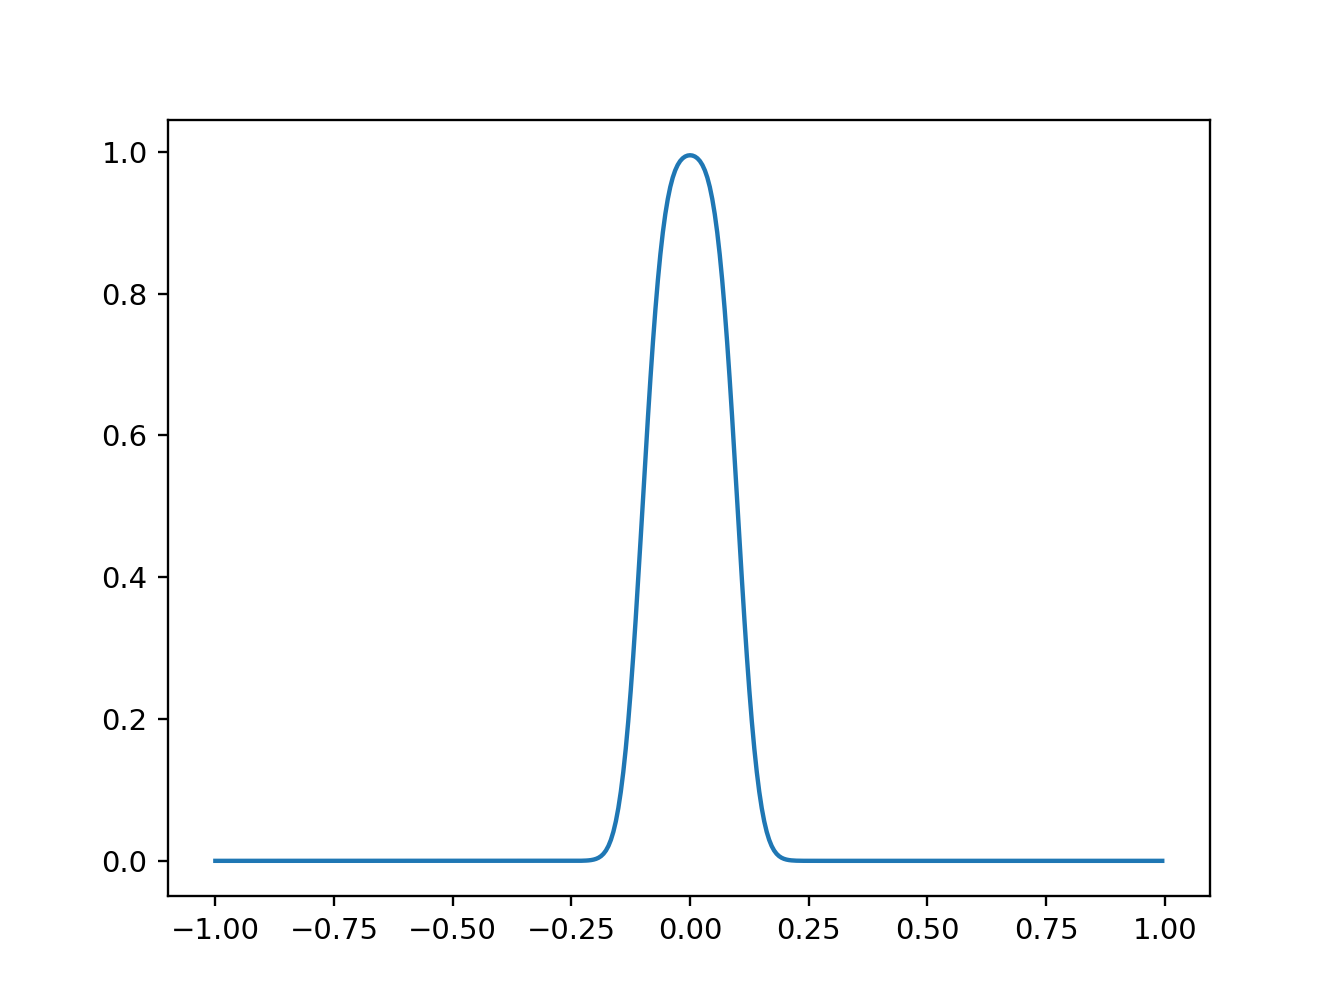

In [78]:
plt.figure()
plt.plot(yy[0,:],phi['g'][0,:])

<IPython.core.display.Javascript object>


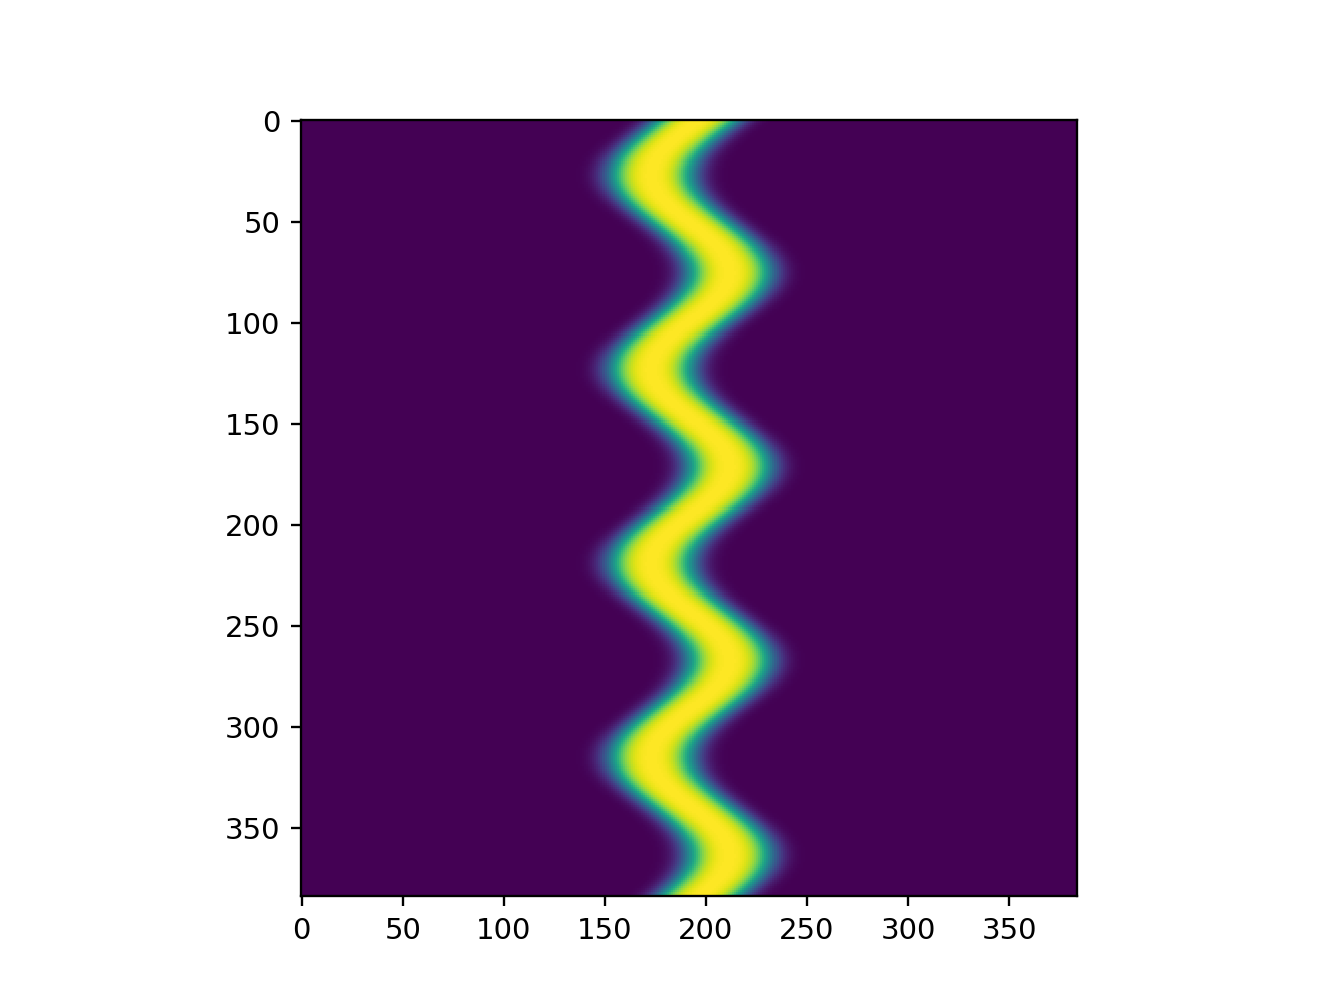

In [86]:
plt.figure()
plt.imshow(sheet(xx,yy,k,omega,0.2,delta,hw,ampl))

<IPython.core.display.Javascript object>


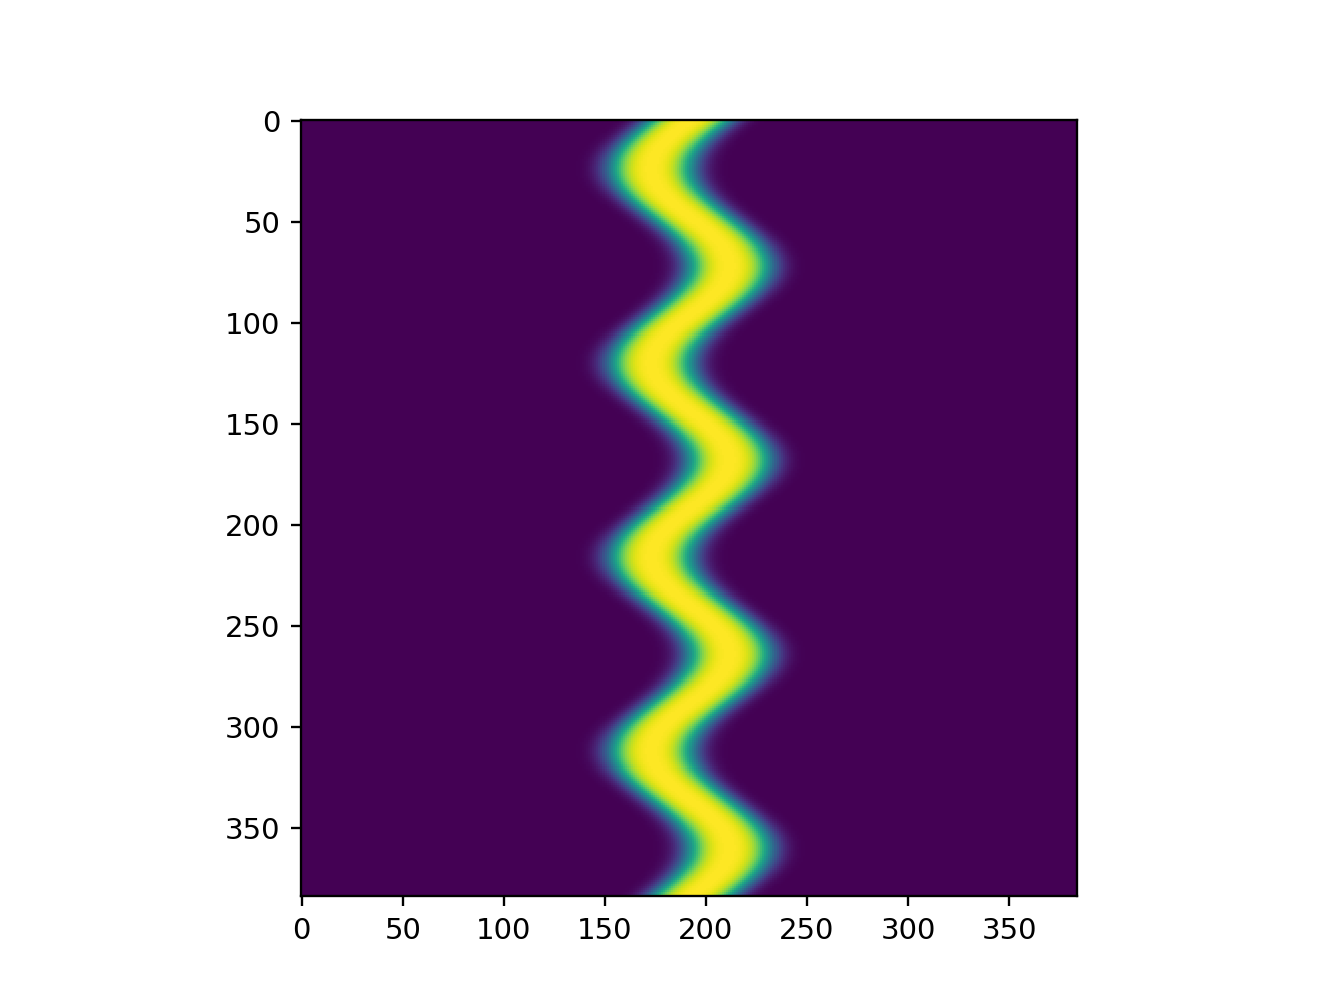

interactive(children=(FloatSlider(value=0.0, description='w', max=1.0), Output()), _dom_classes=('widget-inter…

In [90]:
x = np.linspace(0, 2 * np.pi)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
im = ax.imshow(sheet(xx,yy,k,omega,0,delta,hw,ampl))

def update(w = 0.):
    im.set_data(sheet(xx,yy,k,omega,w,delta,hw,ampl))
    fig.canvas.draw_idle()

widgets.interact(update);